In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing dog vs cat dataset from kaggle

In [ ]:
!kaggle competitions download -c cifar-10

100% 712M/715M [00:24<00:00, 34.1MB/s]
100% 715M/715M [00:24<00:00, 30.8MB/s]


In [ ]:
!ls

cifar-10.zip  drive  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
file_name = '/content/cifar-10.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('file extracted')

file extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.9 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
print('file extracted')

file extracted


In [ ]:
archive.close()

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import os

In [ ]:
filename = os.listdir('/content/train')

In [ ]:
type(filename)

list

In [ ]:
len(filename)

50000

In [ ]:
print(filename[0:5])
print(filename[-5:])

['3834.png', '617.png', '11214.png', '32221.png', '34639.png']
['23821.png', '16095.png', '4357.png', '35545.png', '49252.png']


LABELS PROCESSING

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 776]

,id,label
775,776,bird


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {'frog':0, 'bird':1, 'cat':2, 'dog':3, 'deer':4, 'horse':5, 'ship':6, 'truck':7, 'automobile':8, 'airplane':9}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])

[0, 7, 7, 4, 8]


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:15])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


CONVERT IMAGES TO NUMPY ARRAY

In [ ]:
train_data_folder = '/content/train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
type(data[1])

numpy.ndarray

convert image list and label list to numpy array

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
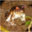

In [ ]:
X[0]

SPLITTING DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 2)

In [ ]:
print(x_train.shape, x_test.shape, y_test.shape, y_train.shape)

(42500, 32, 32, 3) (7500, 32, 32, 3) (7500,) (42500,)


SCALING THE DATA

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

BUILDING THE NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

number_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(number_classes, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train_scaled, y_train, validation_split = 0.1 , epochs = 10)

Epoch 1/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2692 - loss: 2.0340 - val_accuracy: 0.3496 - val_loss: 1.7997
Epoch 2/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3573 - loss: 1.7934 - val_accuracy: 0.3760 - val_loss: 1.7625
Epoch 3/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3804 - loss: 1.7202 - val_accuracy: 0.4007 - val_loss: 1.6485
Epoch 4/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3978 - loss: 1.6843 - val_accuracy: 0.3671 - val_loss: 1.7160
Epoch 5/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4079 - loss: 1.6562 - val_accuracy: 0.4115 - val_loss: 1.6176
Epoch 6/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4116 - loss: 1.6333 - val_accuracy: 0.4167 - val_loss: 1.6233
Epoch 7/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4272 - loss: 1.6006 - val_accuracy: 0.4026 - val_loss: 1.6439
Epoch 8/10
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4294 - loss: 1.5885 - 

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
convolutional_base = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
 867/1196 ━━━━━━━━━━━━━━━━━━━━ 1:48 328ms/step - acc: 0.8058 - loss: 0.6798

In [ ]:
h = history
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()